<a href="https://colab.research.google.com/github/BossaDevTech/BossaDevTech/blob/main/neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)

num_train = len(train_data)
num_val = int(0.1 * num_train)
train_data, val_data, = random_split(train_data, [num_train - num_val, num_val])

batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

print("Data Loaded and DataLoaders are ready!")

100%|██████████| 26421880/26421880 [00:01<00:00, 18294477.78it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 323111.19it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6037210.91it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14569687.58it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Data Loaded and DataLoaders are ready!


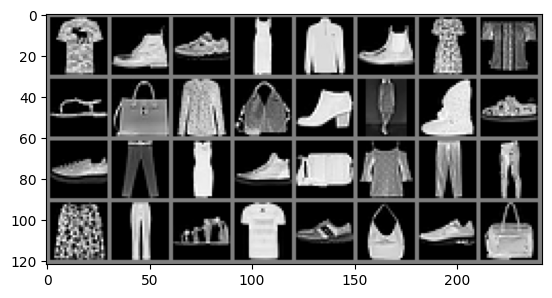

Labels:  T-shirt/top Ankle boot Sneaker Dress Pullover Ankle boot Dress Shirt Sandal Bag Shirt Bag Ankle boot Dress Ankle boot Sneaker Sneaker Trouser Dress Sneaker Bag Shirt Trouser Trouser Pullover Trouser Sandal T-shirt/top Sneaker Bag Sneaker Bag


In [4]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def imshow(img):
    img = img * 0.5 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print('Labels: ', ' '.join(f'{classes[labels[j]]}' for j in range(len(labels))))

In [5]:
# Define the CNN architecture
class FashionCNN(nn.Module):
    # Initialize the convolutional layers, pooling layer, linear layers, and dropout layer
    def __init__(self):
        super(FashionCNN, self).__init__()
        # Convolutional layer (sees 28x28x1 image tensor)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Convolutional layer (sees 14x14x32 tensor after pooling)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Linear layer (64 * 7 * 7 = 3136)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # Linear layer (128 -> 10)
        self.fc2 = nn.Linear(128, 10)
        # Dropout layer (p=0.5)
        self.dropout = nn.Dropout(0.5)

    # Define the forward pass through the network (i.e., how data moves through the layers)
    def forward(self, x):
        # Add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten image input
        x = x.view(-1, 64 * 7 * 7)
        # Add dropout layer
        x = self.dropout(x)
        # Add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # Add dropout layer
        x = self.dropout(x)
        # Add 2nd hidden layer, with 10 output units for 10 classes
        x = self.fc2(x)
        return x

# Create an instance of the CNN, making it ready to be trained with data
model = FashionCNN()
print(model)

# Specify the loss function
# This will tell us the difference between what the model predicted
# and what the correct (labeled) answer was
# Cross Entropy is a common loss function for classification problems
criterion = nn.CrossEntropyLoss()

# Specify optimizer
# This minimizes the loss (cost) by adjusting weights, biases and learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

FashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [6]:
num_epochs = 10  # Number of epochs to train for

for epoch in range(1, num_epochs + 1):
    # Keep track of training loss
    train_loss = 0.0

    ###################
    # Train the model #
    ###################
    model.train()  # Prepare model for training
    for data, target in train_loader:
        # Move images and labels to GPU if CUDA is available (to increase speed and efficiency)
        # CUDA is a parallel computing platform from NVIDIA
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        # Before the model can update weights during training, it needs a clean slate
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader.dataset)

    # print training statistics
    print(f'Epoch: {epoch} \tTraining Loss: {train_loss:.6f}')

Epoch: 1 	Training Loss: 0.915734
Epoch: 2 	Training Loss: 0.570344
Epoch: 3 	Training Loss: 0.500238
Epoch: 4 	Training Loss: 0.462880
Epoch: 5 	Training Loss: 0.439933
Epoch: 6 	Training Loss: 0.417853
Epoch: 7 	Training Loss: 0.402043
Epoch: 8 	Training Loss: 0.388982
Epoch: 9 	Training Loss: 0.378140
Epoch: 10 	Training Loss: 0.365941


Accuracy on the validation set: 89.50%


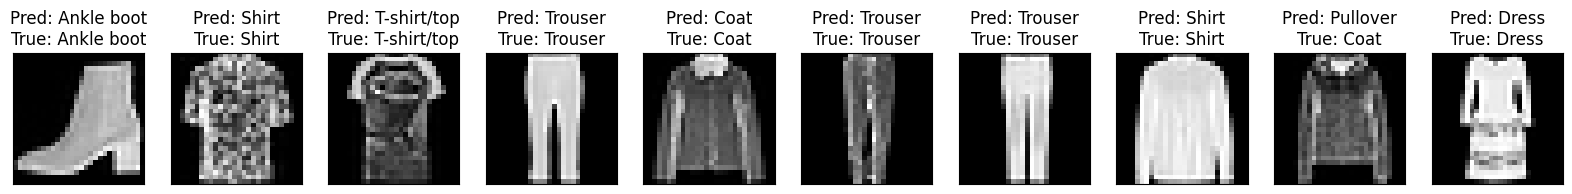

In [7]:
# Some layers behave differently during training vs. evaluation
# So set the model to evaluation mode
model.eval()

# Initialize variables for accuracy calculation
correct = 0
total = 0

# Set up visualization values
images_to_show = 10
fig = plt.figure(figsize=(20, 3))  # Adjust the figure size so images are not too cramped

# Updating gradients is only required during training
# No gradients needed for evaluation
with torch.no_grad():
    # Loop through validation data, move it to the GPU if available
    # and make predictions for each image, updating accuracy counters
    for i, (data, target) in enumerate(val_loader):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        output = model(data)
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

        # Visualize the images and predictions
        if i < images_to_show:
            ax = fig.add_subplot(1, images_to_show, i + 1, xticks=[], yticks=[])
            # Convert image to displayable format
            img = data.cpu().data[i].numpy()
            img = img.squeeze()  # Remove the channel dimension
            ax.imshow(img, cmap="gray")
            ax.set_title(f"Pred: {classes[predicted[i]]}\nTrue: {classes[target[i]]}")

# Calculate accuracy for all predictions, then print
accuracy = 100 * correct / total
print(f'Accuracy on the validation set: {accuracy:.2f}%')

plt.show()